# Visualize Training History.

Find the sweet spot in a NN loss and or accuracy score 

In [1]:
# Load library

import numpy as np
from keras import models
from keras import layers
from keras.datasets import imdb
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [2]:
# Set random seed

np.random.seed(0)

In [3]:
# Set the number of features we want

number_features = 10000



In [4]:
# Load data and target vector from movie review data

(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words = number_features)

In [5]:
# Convert movie review data to a one hot encoded feature matrix

tokenizer = Tokenizer(num_words = number_features)

features_train = tokenizer.sequences_to_matrix(data_train, mode = "binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode = "binary")

In [6]:
# Start NN

network = models.Sequential()

In [7]:
# Add fully connected layer with a ReLU activation fuction.

network.add(layers.Dense(units = 16, activation = "relu", input_shape = (number_features,)))

In [8]:
# Add fully connected layer with a ReLU activation fuction.

network.add(layers.Dense(units = 16, activation = "relu"))

In [9]:
# Add fully connected layer with a ReLU activation fuction.

network.add(layers.Dense(units = 1, activation = "sigmoid"))

In [10]:
# Comile NN

network.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [11]:
# Train NN

history = network.fit(features_train, target_train, epochs = 20, verbose = 1, batch_size = 1000, validation_data = (features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 191us/step - loss: 0.5262 - accuracy: 0.7634 - val_loss: 0.4053 - val_accuracy: 0.8646
Epoch 2/20
25000/25000 [==============================] - 3s 139us/step - loss: 0.3221 - accuracy: 0.8953 - val_loss: 0.3212 - val_accuracy: 0.8826
Epoch 3/20
25000/25000 [==============================] - 3s 139us/step - loss: 0.2482 - accuracy: 0.9175 - val_loss: 0.2905 - val_accuracy: 0.8883
Epoch 4/20
25000/25000 [==============================] - 4s 140us/step - loss: 0.2013 - accuracy: 0.9302 - val_loss: 0.2832 - val_accuracy: 0.8882
Epoch 5/20
25000/25000 [==============================] - 4s 142us/step - loss: 0.1752 - accuracy: 0.9391 - val_loss: 0.3642 - val_accuracy: 0.8556
Epoch 6/20
25000/25000 [==============================] - 4s 141us/step - loss: 0.1595 - accuracy: 0.9455 - val_loss: 0.3012 - val_accuracy: 0.8802
Epoch 7/20
25000/25000 [==============================] - 4s 1

In [12]:
# Get training and test loss histories

training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

In [13]:
# Create count od the number of epochs

epoch_count = range(1, len(training_loss) +1)

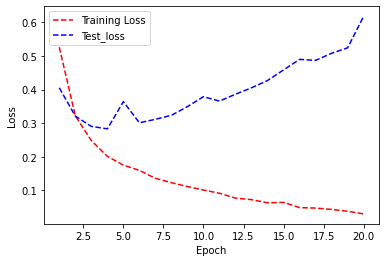

In [14]:
# Visualize loss history

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b--")
plt.legend(["Training Loss", "Test_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [15]:
# Get training and test accuracy histories 

training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

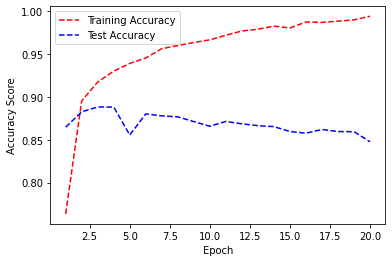

In [20]:
# Visualize the accuracy history 

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b--")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

# Discussion

When our NN is new it will have a poor performance. As the NN learn from the train data the model's error on both the training and test set will tend to increase.

However, at a certain point the NN start to memorizing the training data and overfits.

This happens when the training error decrease while the best error will start increasing.

In many cases there is a SWEET SPOT where the test error (error we mainly care about) is at its lowest point.

Note that the test error is lowest around epoch 5. After this point, the training loss continue to increase while the test loss starts increasing. At this point onward, the model is overfitting

